In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA LOADING INTO DATAFRAME-
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Dataset loaded successfully.")


Dataset loaded successfully.


In [2]:
# DATA EXPLORATION-

# Display basic information about dataset-
print("\nDataset Information:")
print(df.info(3))

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values-
print("\nMissing Values:")
print(df.isnull().sum())

# Display the first few rows-
print("\nFirst Few Rows:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   Business Travel             1470 non-null   object
 3   Daily Rate                  1470 non-null   int64 
 4   Department                  1470 non-null   object
 5   Distance From Home          1470 non-null   int64 
 6   Education                   1470 non-null   int64 
 7   Education Field             1470 non-null   object
 8   Employee Count              1470 non-null   int64 
 9   Employee Number             1470 non-null   int64 
 10  Environment Satisfaction    1470 non-null   int64 
 11  Gender                      1470 non-null   object
 12  Hourly Rate                 1470 non-null   int64 
 13  Job Involvement           


Attrition Rate:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


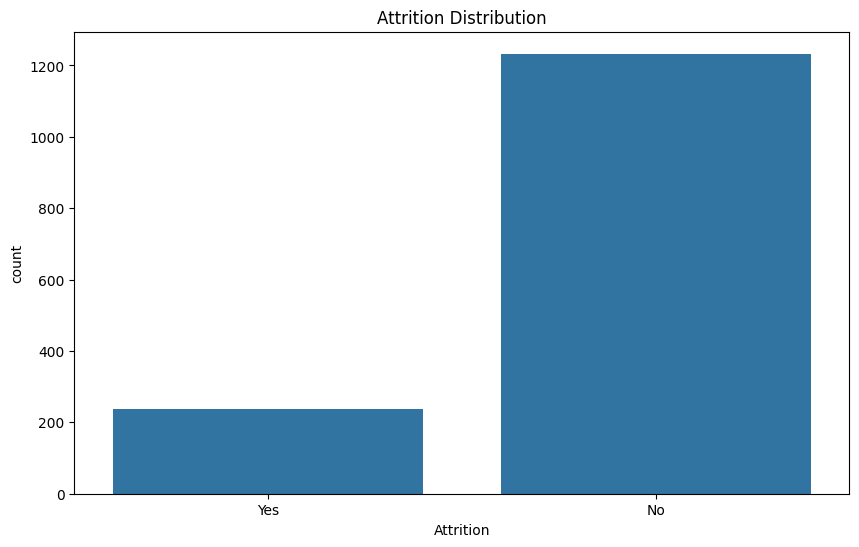

In [3]:
# ATTRITION ANALYSIS-

# Calculate attrition rate-
attrition_rate = df['Attrition'].value_counts(normalize=True)
print("\nAttrition Rate:")
print(attrition_rate)

# Visualize attrition distribution-
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()


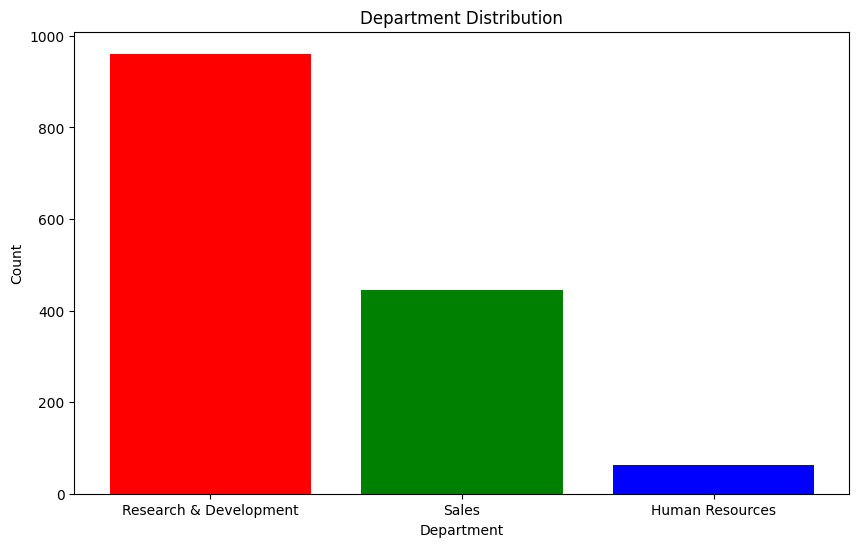

In [4]:
#Employees Count In Each Department-

plt.figure(figsize=(10, 6))
plt.bar(df['Department'].value_counts().index, df['Department'].value_counts().values, color=['red', 'green', 'blue'])
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

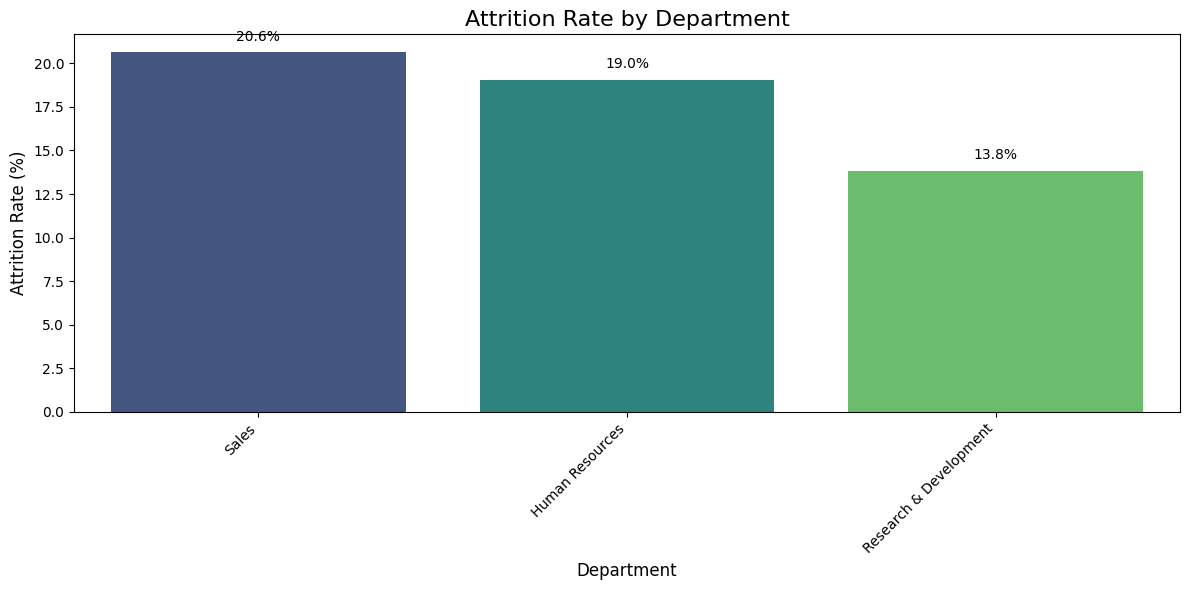

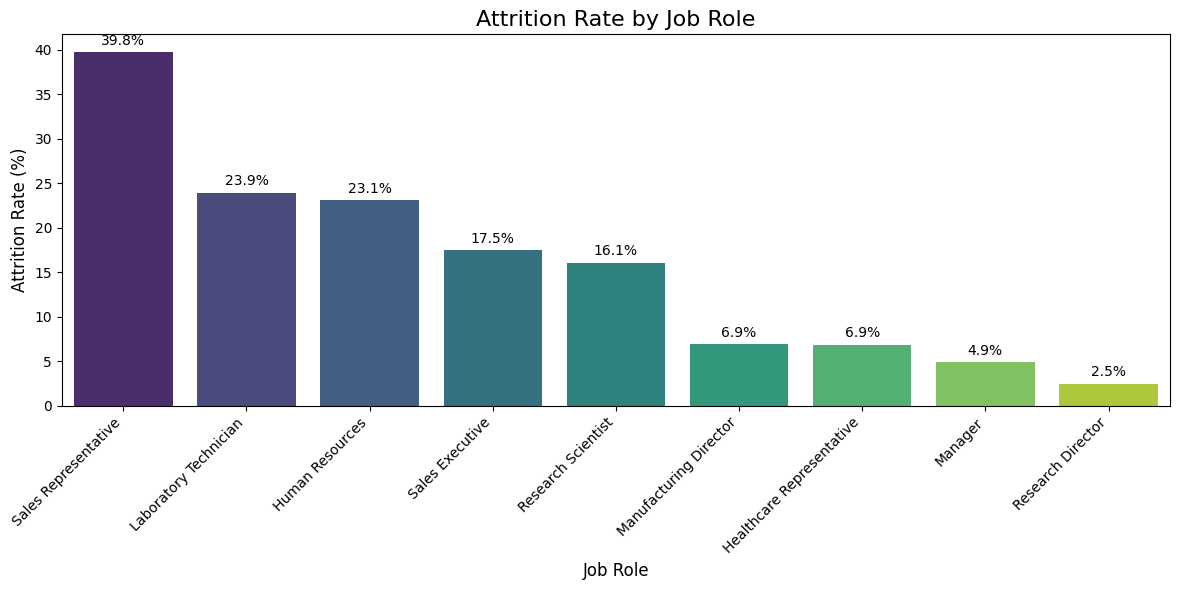

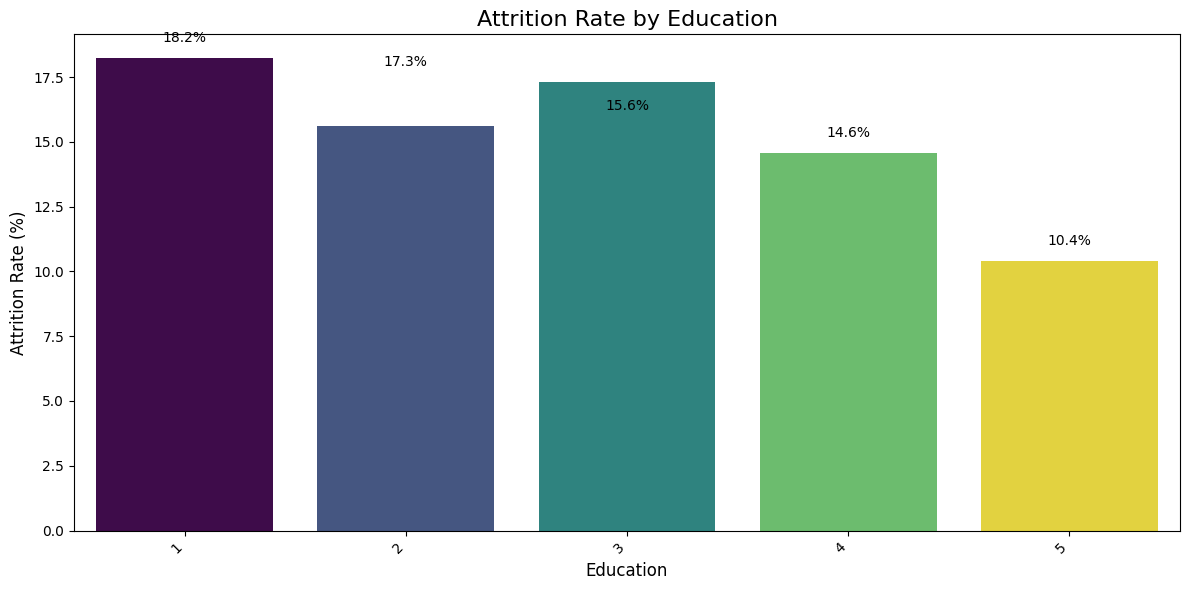

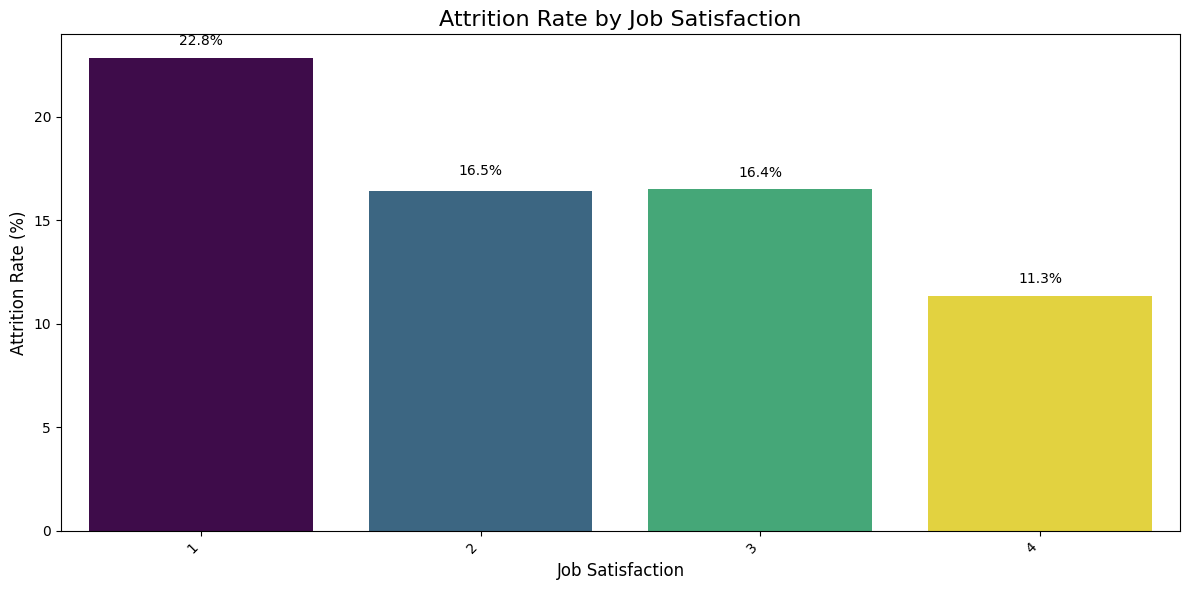

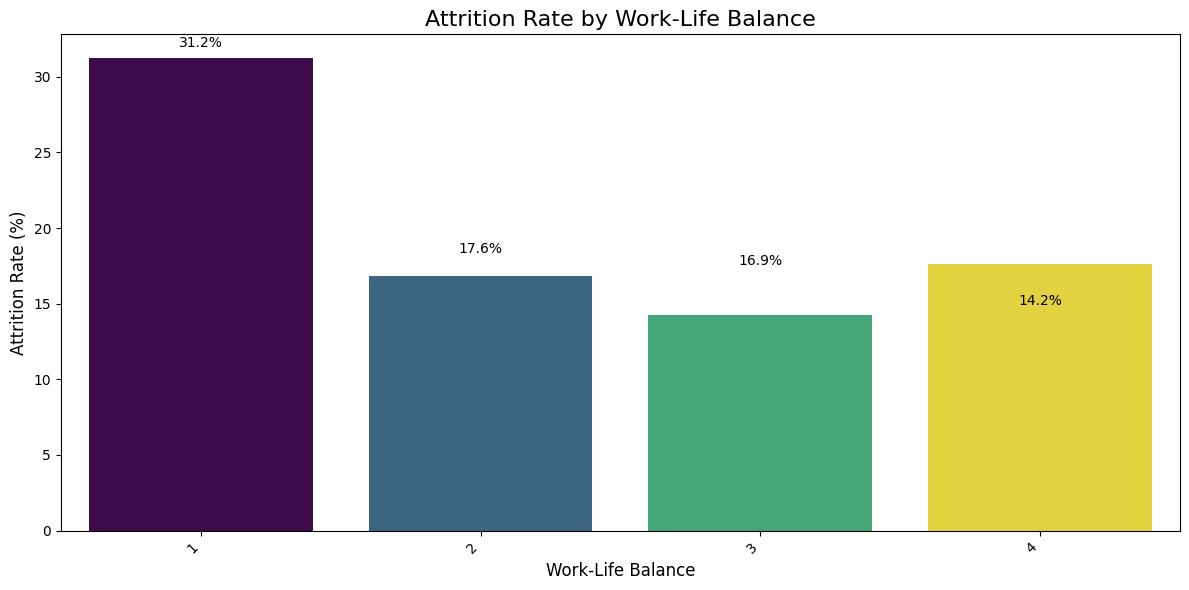

In [5]:
# Analysis Of Attrition By Key Factors-
factors = ['Department', 'Job Role', 'Education', 'Job Satisfaction', 'Work-Life Balance']
for factor in factors:
    plt.figure(figsize=(12, 6))
    
    # Calculate attrition rate
    attrition_rate = df.groupby(factor)['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
    attrition_rate.columns = [factor, 'Attrition Rate']
    
    # Sort by attrition rate for better visualization
    attrition_rate = attrition_rate.sort_values('Attrition Rate', ascending=False)
    
    # Create the plot
    sns.barplot(x=factor, y='Attrition Rate', data=attrition_rate, 
                palette='viridis', hue=factor, dodge=False, legend=False)
    
    plt.title(f'Attrition Rate by {factor}', fontsize=16)
    plt.ylabel('Attrition Rate (%)', fontsize=12)
    plt.xlabel(factor, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for i, v in enumerate(attrition_rate['Attrition Rate']):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

C:\Users\Mizzy\AppData\Local\Temp\ipykernel_15708\961470571.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Performance Rating', data=df, palette='Set2')


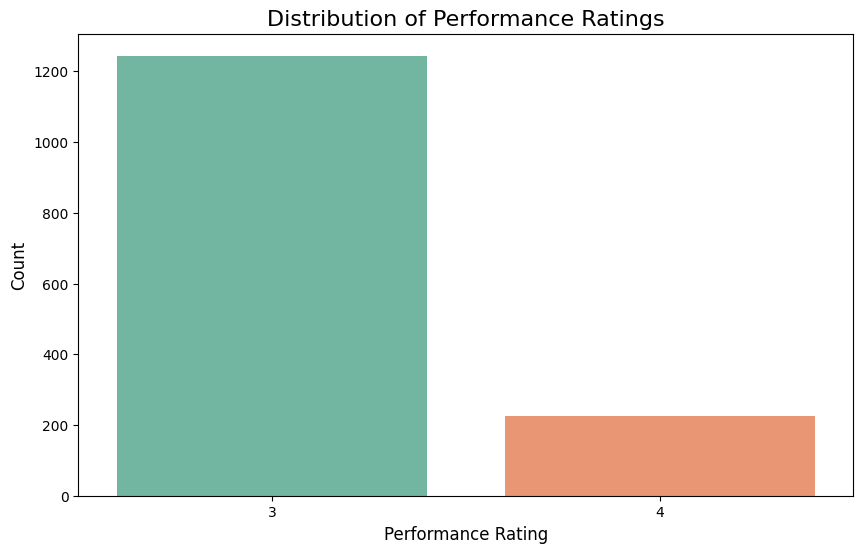

In [6]:
# Analysis Of Performance Ratings-

plt.figure(figsize=(10, 6))
sns.countplot(x='Performance Rating', data=df, palette='Set2')
plt.title('Distribution of Performance Ratings', fontsize=16)
plt.xlabel('Performance Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


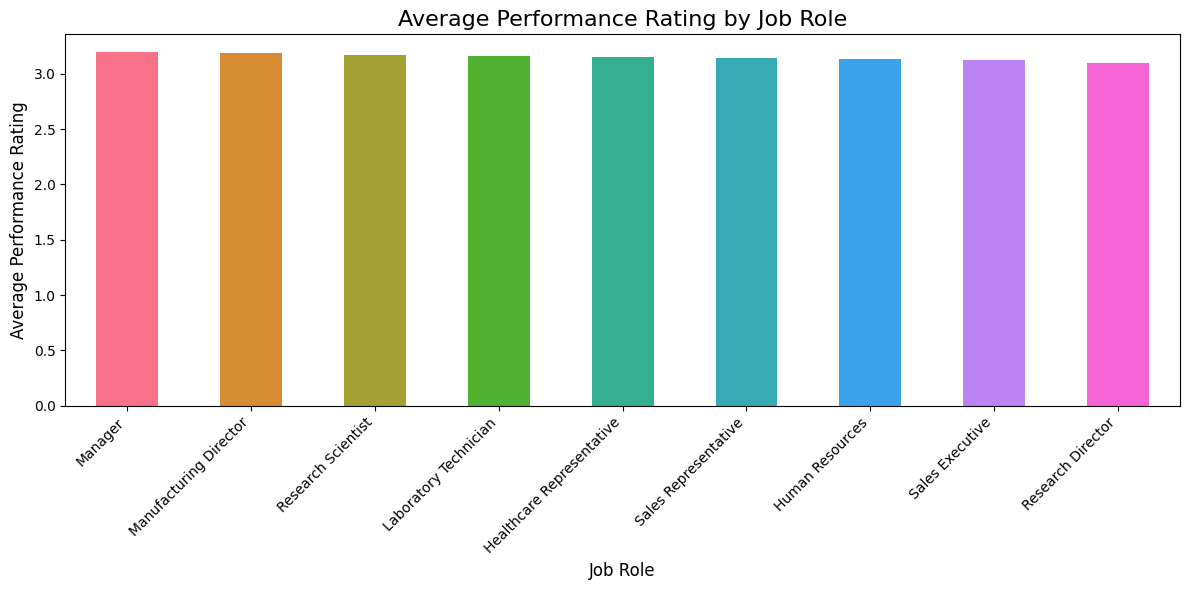

In [7]:
# Aaverage Performance Rating By Job Role-

performance_by_role = df.groupby('Job Role')['Performance Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
performance_by_role.plot(kind='bar', color=sns.color_palette("husl", 9))
plt.title('Average Performance Rating by Job Role', fontsize=16)
plt.ylabel('Average Performance Rating', fontsize=12)
plt.xlabel('Job Role', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

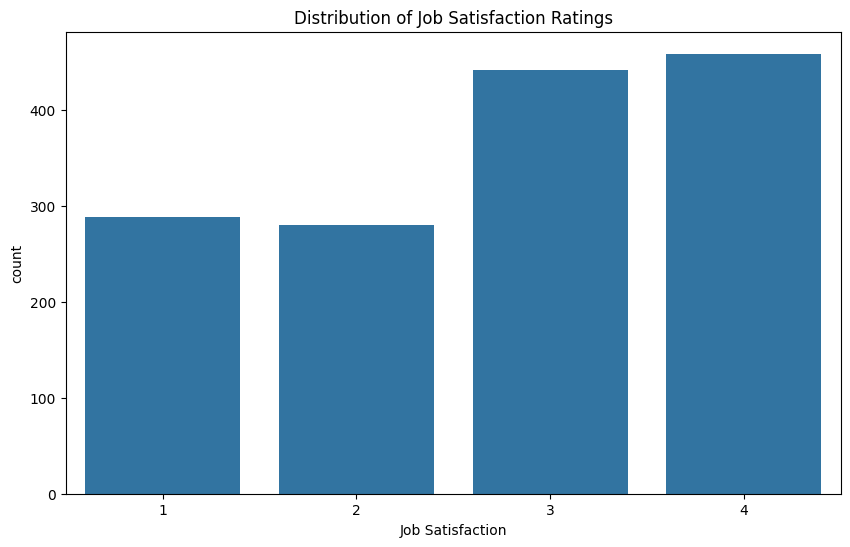

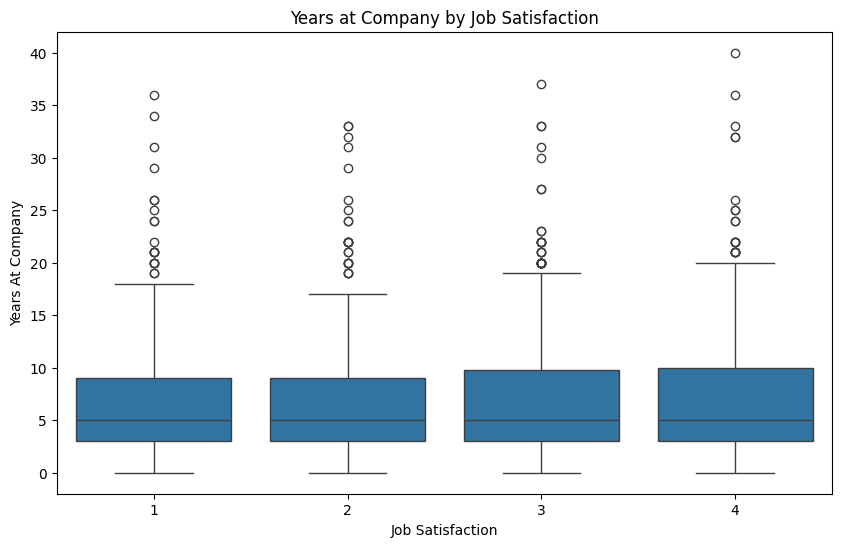

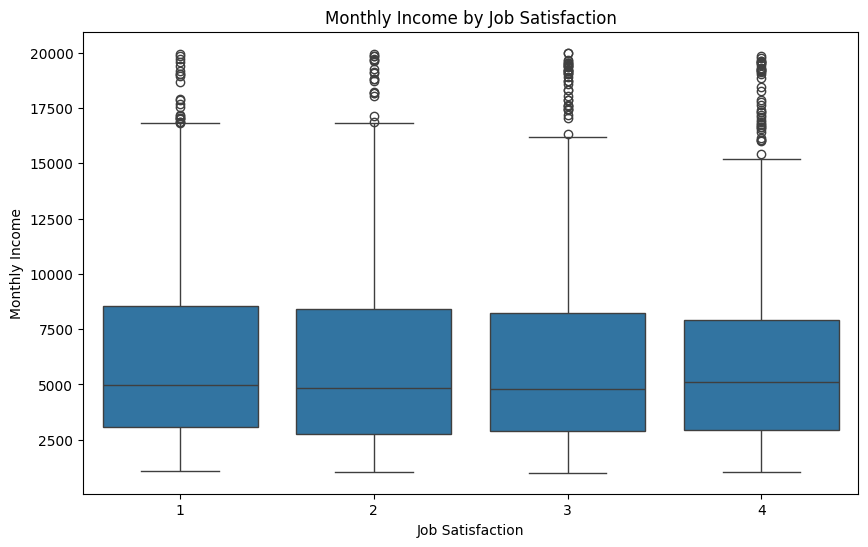

In [8]:
# Job Satisfaction Distribution-

plt.figure(figsize=(10, 6))
sns.countplot(x='Job Satisfaction', data=df)
plt.title('Distribution of Job Satisfaction Ratings')
plt.show()

# Relationship between job satisfaction and years at company-
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job Satisfaction', y='Years At Company', data=df)
plt.title('Years at Company by Job Satisfaction')
plt.show()

# Relationship between job satisfaction and monthly income-
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job Satisfaction', y='Monthly Income', data=df)
plt.title('Monthly Income by Job Satisfaction')
plt.show()

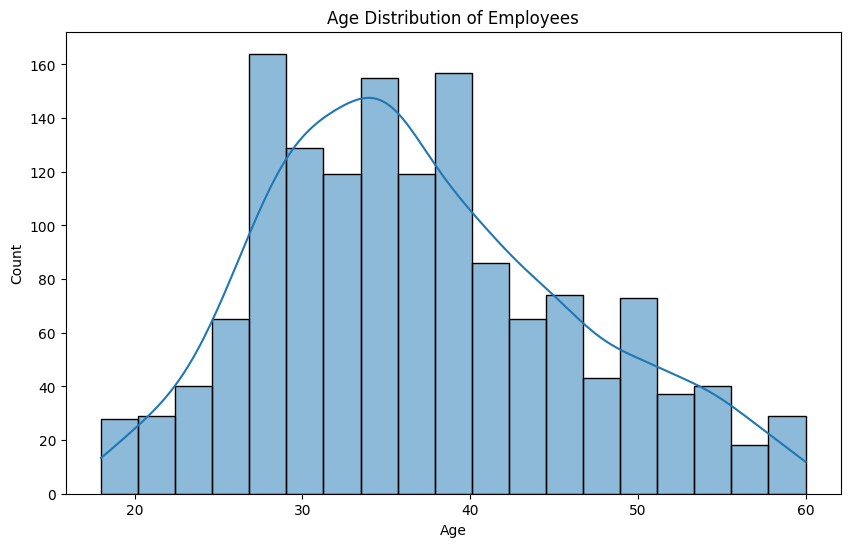

In [9]:
# Age distribution-
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.show()


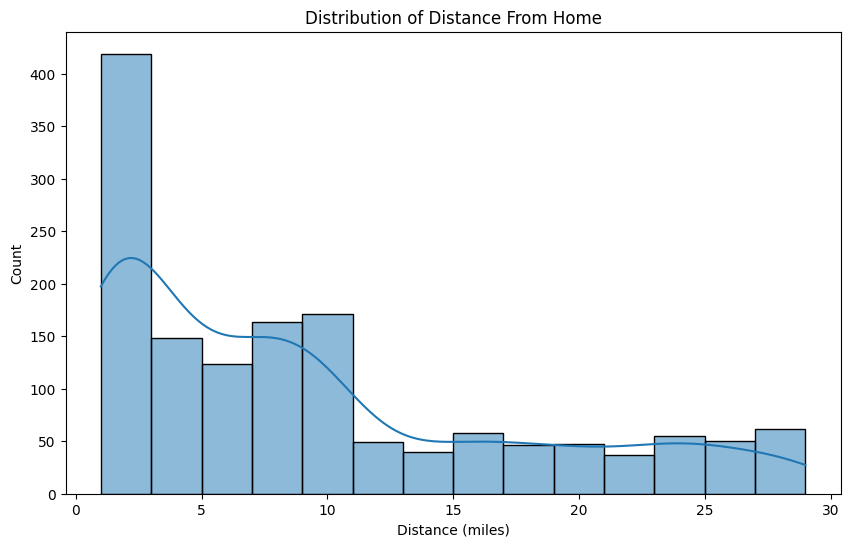

In [10]:
# Distance From Home Distribution-
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance From Home'], kde=True)
plt.title('Distribution of Distance From Home')
plt.xlabel('Distance (miles)')
plt.show()


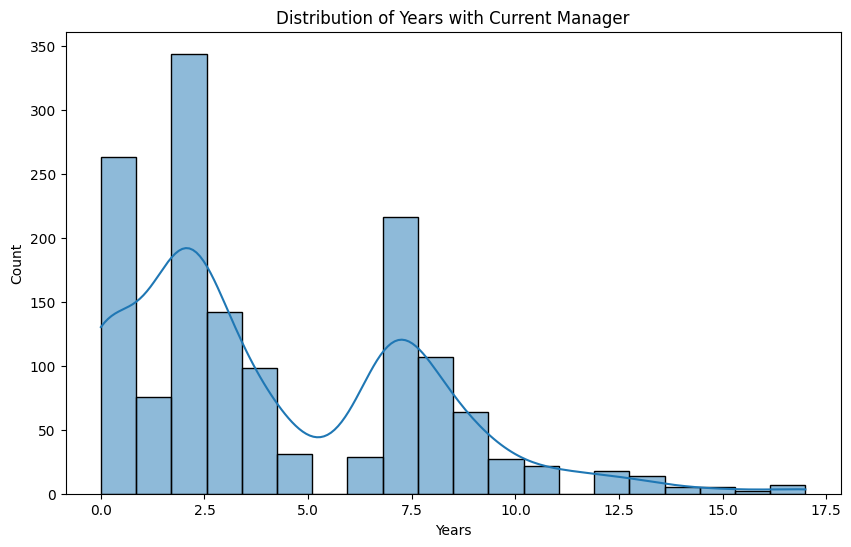

In [11]:
# Years with Current Manager Distribution-
plt.figure(figsize=(10, 6))
sns.histplot(df['Years With Current Manager'], kde=True)
plt.title('Distribution of Years with Current Manager')
plt.xlabel('Years')
plt.show()


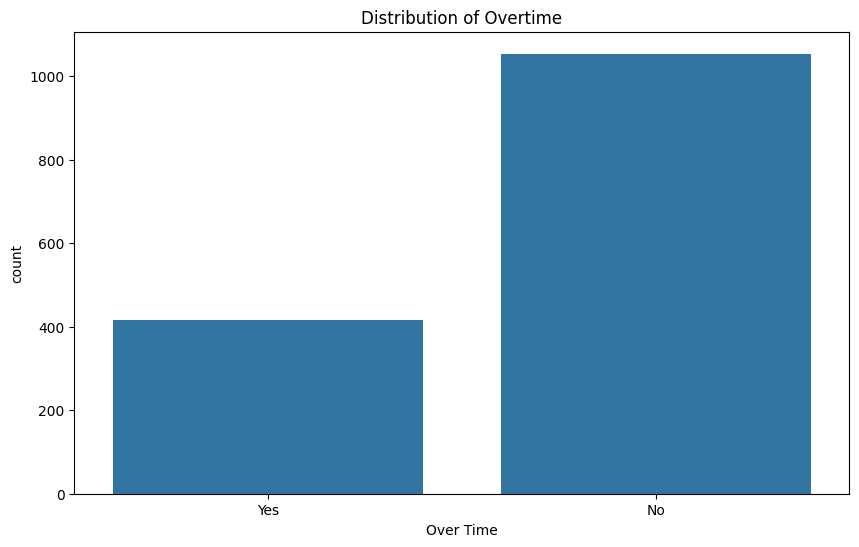

In [12]:
# Overtime Distribution-
plt.figure(figsize=(10, 6))
sns.countplot(x='Over Time', data=df)
plt.title('Distribution of Overtime')
plt.show()



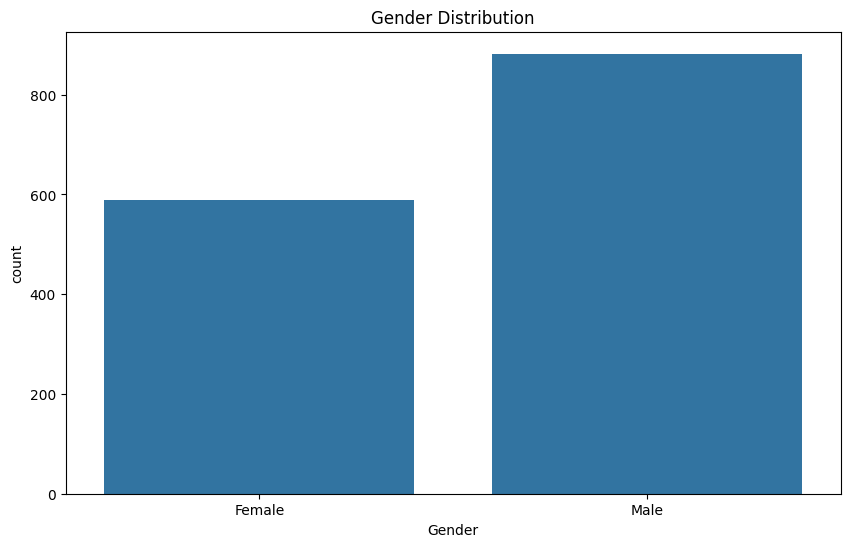

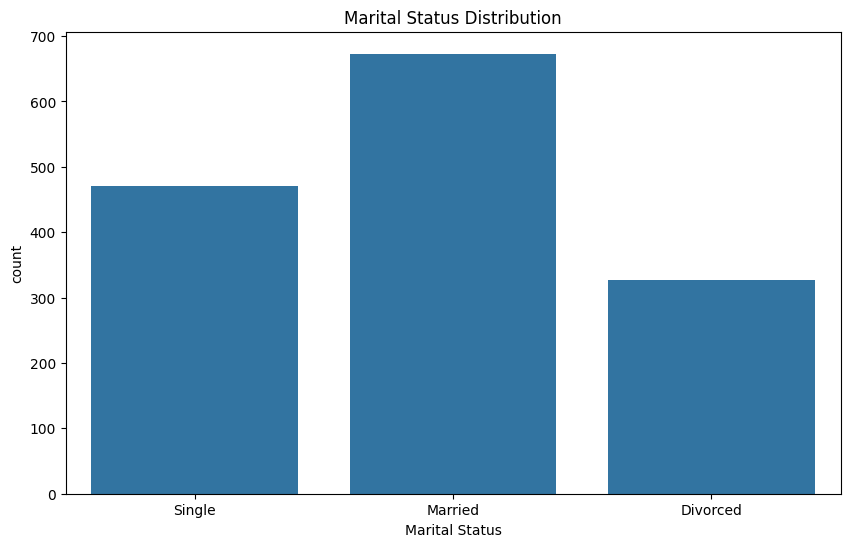

In [13]:
# Gender Distribution-
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Marital Status Distribution-
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', data=df)
plt.title('Marital Status Distribution')
plt.show()

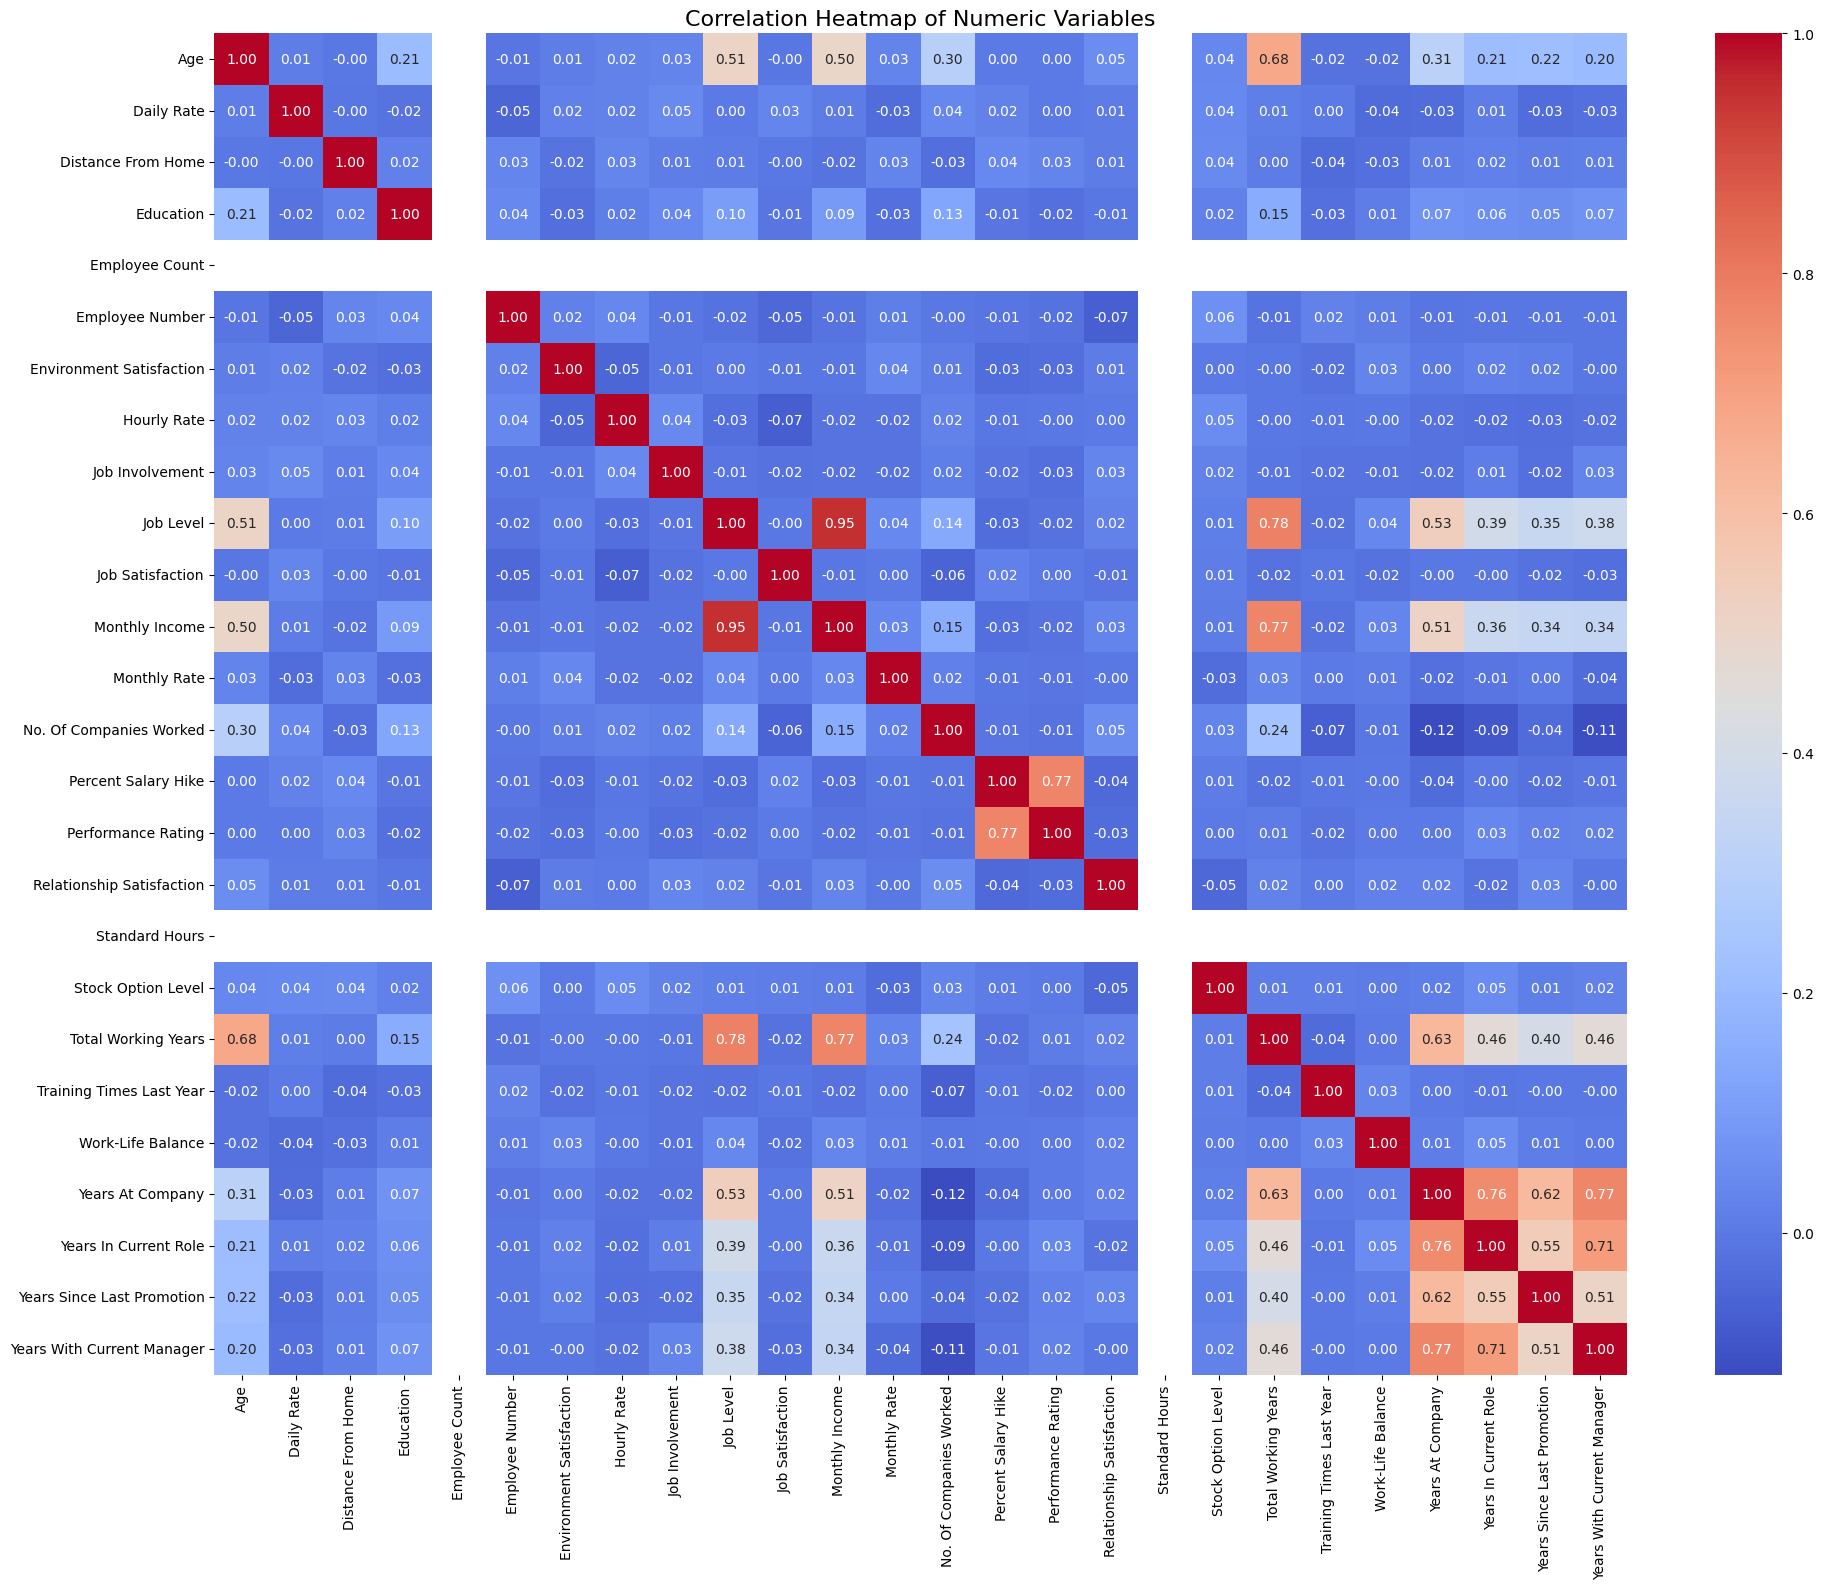

In [14]:
# Correlation Analysis-
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()
